In [1]:
#import  the libraries 

import numpy as np    #for numerical computing
import pandas as pd   #for dealing with dataFrames
import matplotlib.pyplot as plt    #for Visualization 

#import our data to a "data" dataframe 
data = pd.read_csv("50_Startups.csv")

#show the first 5 row in the data
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
#drop unused colums
data.drop('State', axis=1, inplace=True)

In [3]:
# data normalization for best performance and stability
data = ((data - data.mean()) / data.std())
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,1.996146,0.555117,2.132295,1.990990
1,1.936203,1.071924,1.904267,1.979335
2,1.736731,-0.720938,1.610180,1.960934
3,1.539157,-0.095396,1.407916,1.758771
4,1.489812,-1.069066,1.268648,1.344094


In [4]:
#To capture the bias term and make more accurate predictions.
data.insert(0, 'Ones', 1)
data.head()

,Ones,R&D Spend,Administration,Marketing Spend,Profit
0,1,1.996146,0.555117,2.132295,1.990990
1,1,1.936203,1.071924,1.904267,1.979335
2,1,1.736731,-0.720938,1.610180,1.960934
3,1,1.539157,-0.095396,1.407916,1.758771
4,1,1.489812,-1.069066,1.268648,1.344094


In [5]:

cols = data.shape[1]
#assign 'Ones', 'R&D Spend', 'Administration', 'Marketing Spend' to x
x = data.iloc[:,0:cols-1]

#assign  'Profit' to y
y = data.iloc[:,cols-1:cols]



In [8]:
#convert x, y to matrices 
x = np.matrix(x)
y = np.matrix(y)

#initialize theta as a matrix of zeroes 
theta = np.matrix(np.array([0,0,0,0]))

print(x,"\n")
print(y,"\n")
print(theta)

[[ 1.00000000e+00  1.99614554e+00  5.55117064e-01  2.13229487e+00]
 [ 1.00000000e+00  1.93620295e+00  1.07192383e+00  1.90426724e+00]
 [ 1.00000000e+00  1.73673149e+00 -7.20937676e-01  1.61018024e+00]
 [ 1.00000000e+00  1.53915733e+00 -9.53961174e-02  1.40791630e+00]
 [ 1.00000000e+00  1.48981182e+00 -1.06906562e+00  1.26864771e+00]
 [ 1.00000000e+00  1.26693738e+00 -7.68437475e-01  1.24160501e+00]
 [ 1.00000000e+00  1.32659806e+00  9.22778657e-01 -6.81233675e-01]
 [ 1.00000000e+00  1.23254321e+00  8.63216170e-01  9.22817037e-01]
 [ 1.00000000e+00  1.02001313e+00  9.77032733e-01  8.22536075e-01]
 [ 1.00000000e+00  1.08084587e+00 -4.52050780e-01  7.68307167e-01]
 [ 1.00000000e+00  6.14162931e-01 -3.83703522e-01  1.48301628e-01]
 [ 1.00000000e+00  5.87124609e-01 -1.05483038e+00  3.16619133e-01]
 [ 1.00000000e+00  4.38804886e-01  2.13283692e-01  3.17395074e-01]
 [ 1.00000000e+00  3.98036519e-01  5.05051396e-01  3.40499848e-01]
 [ 1.00000000e+00  1.00695756e+00  1.25644329e+00  3.71965873e

In [9]:
#computeCost function
def computeCost(x , y, theta):
    inner = np.power(((x * theta.T) - y ), 2)
    return np.sum(inner) / (2 * len(x))

In [10]:
#gradientDescent function
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) #[0,0,0,0]
    parameters = int(theta.ravel().shape[1]) #4
    cost = np.zeros(iters)

    for i in range(iters):
        error = (x * theta.T) - y #Hypothesis - y
        
        for j in range(parameters): #0 1 2 3
            term = np.multiply(error, x[:,j])  
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(x, y, theta)
    
    return theta, cost


In [21]:
alpha = 0.1
iters = 80

g, cost = gradientDescent(x, y, theta, alpha, iters)


In [22]:
print(g)

[[-6.70130618e-16  8.48223084e-01  5.79066735e-03  1.48545227e-01]]


In [23]:
print(cost)

[0.3541581  0.26054676 0.19591329 0.15116944 0.12008259 0.09837821
 0.08312446 0.07231024 0.06455581 0.0589144  0.05473614 0.05157479
 0.04912375 0.04717223 0.04557513 0.04423241 0.04307501 0.04205506
 0.0411393  0.04030448 0.03953424 0.03881697 0.0381443  0.03751016
 0.03691003 0.03634046 0.03579878 0.03528286 0.03479094 0.03432153
 0.03387335 0.03344527 0.03303628 0.03264542 0.03227186 0.03191477
 0.03157341 0.03124707 0.03093508 0.03063679 0.03035159 0.03007892
 0.02981821 0.02956893 0.0293306  0.02910271 0.02888483 0.0286765
 0.0284773  0.02828685 0.02810474 0.02793063 0.02776414 0.02760496
 0.02745276 0.02730724 0.0271681  0.02703506 0.02690785 0.02678623
 0.02666993 0.02655874 0.02645242 0.02635077 0.02625357 0.02616064
 0.02607178 0.02598682 0.02590558 0.02582791 0.02575365 0.02568264
 0.02561474 0.02554982 0.02548775 0.0254284  0.02537166 0.0253174
 0.02526552 0.02521592]


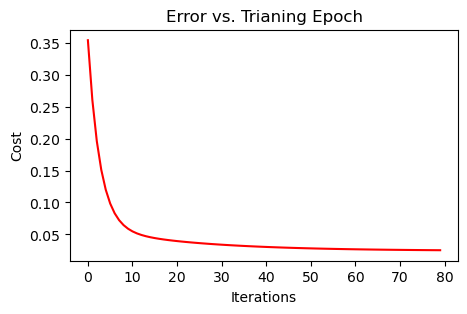

In [24]:
#draw error graph

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Trianing Epoch');

